# Gaussian processes with some uncertainty at observations

add noise to target funciton and an identity array with some covar of noise to the inverse of Kx1

picture of the matrix maths: see the bottom noise part as that is what I'll be implementing (additive Gaussian noise)

![image](images/gaussian_processes_definitive.png)

In [ ]:
%%capture
%pip install numpy
%pip install matplotlib

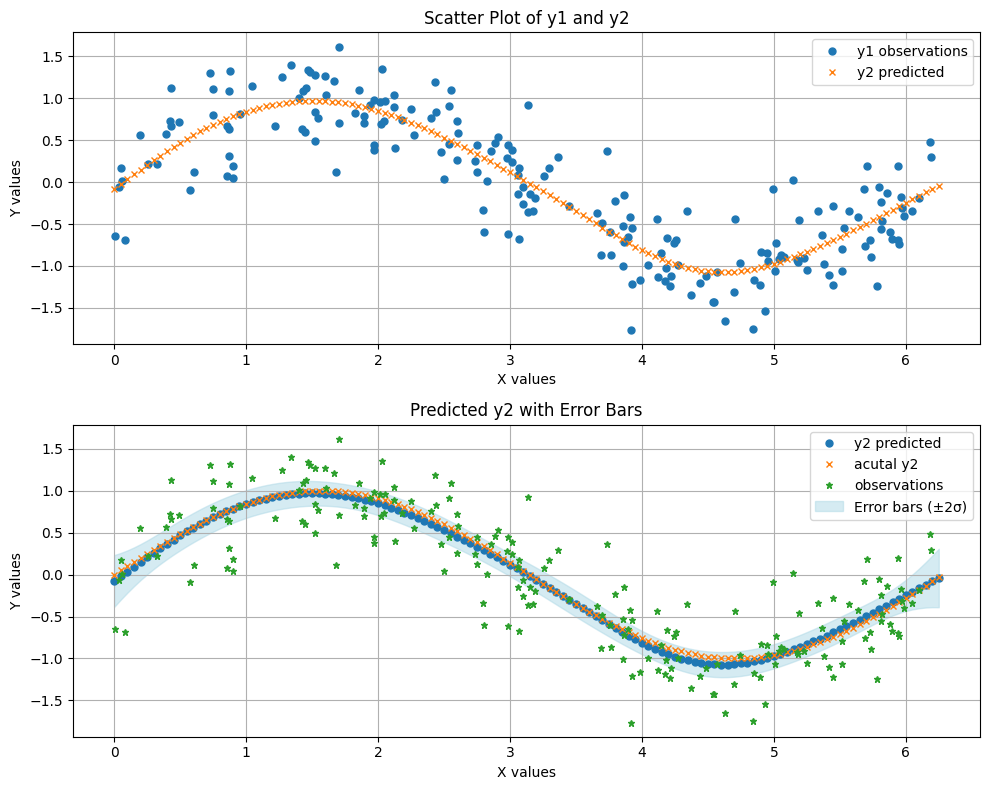

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def target_function(X):
    return np.sin(X)

def noisy_observations(X, covar):
    return np.array(target_function(X) + np.random.randn(len(X))*covar)

def show_dist(x, y):
    plt.plot(x, y, 'o')
    return

def show_covar_mat(covar_mat):
    plt.imshow(covar_mat)
    return

def rbf_kernel(x1,x2):
    return np.exp(-0.5*((abs(x1-x2))**2))

def gen_covar_mat(x1, x2, covar_scalar, kernel):
    x_arr = np.hstack([x1] + [x2])
    covar_mat = np.zeros((len(x_arr),len(x_arr)))
    for i,x1 in enumerate(x_arr):
        for j,x2 in enumerate(x_arr):
            covar_mat[i][j] = kernel(x1,x2)
    return np.array(covar_mat*covar_scalar)


def partition_covar_mat(covar_mat, x1_len):
    covar_mat = np.array(covar_mat)
    covarx1x1 = covar_mat[:x1_len,:x1_len]
    covarx2x2 = covar_mat[x1_len:,x1_len:]
    covarx1x2 = covar_mat[:x1_len,x1_len:]
    return covarx1x1,covarx2x2, covarx1x2, covarx1x2.T

def solve_gp(covar_mat, y1_arr, x1_arr, covar_noise):
    S = partition_covar_mat(covar_mat, len(x1_arr))
    Sx1x1, Sx2x2, Sx1x2, Sx2x1 = S
    # changed here ot add noise
    Sx1x1inv = np.linalg.inv(Sx1x1+covar_noise*np.eye(len(Sx1x1)))

    mu = Sx2x1 @ Sx1x1inv @ y1_arr

    covar = Sx2x2 - Sx2x1 @ Sx1x1inv @ Sx1x2
    return mu, covar

def get_covar_arr(covar_mat_x2_c_x1):
    covar_arr = []
    for i in range(len(covar_mat_x2_c_x1)):
        for j in range(len(covar_mat_x2_c_x1)):
            if i == j:
                covar_arr.append(covar_mat_x2_c_x1[i][j])

def plot_all(x1_arr,x2_arr,y1_arr,y2_arr,covar_x2_mat):
    error_bars = 2 * np.sqrt(np.diag(covar_x2_mat))

    y2_actual = target_function(x2_arr)

    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # First subplot: Scatter plot of y1_arr and y2_arr
    ax[0].plot(x1_arr, y1_arr, 'o', label='y1 observations', markersize=5)
    ax[0].plot(x2_arr, y2_arr, 'x', label='y2 predicted', markersize=5)
    ax[0].set_title('Scatter Plot of y1 and y2')
    ax[0].set_xlabel('X values')
    ax[0].set_ylabel('Y values')
    ax[0].legend()
    ax[0].grid()

    # Second subplot: Predictions with error bars
    ax[1].plot(x2_arr, y2_arr, 'o', label='y2 predicted', markersize=5)
    ax[1].plot(x2_arr,y2_actual, 'x', label='acutal y2', markersize=5)
    ax[1].plot(x1_arr,y1_arr, '*',label='observations', markersize=5)
    ax[1].fill_between(x2_arr, y2_arr - error_bars, y2_arr + error_bars,
                      color='lightblue', alpha=0.5, label='Error bars (±2σ)')
    ax[1].set_title('Predicted y2 with Error Bars')
    
    ax[1].set_xlabel('X values')
    ax[1].set_ylabel('Y values')
    ax[1].legend()
    ax[1].grid()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


def main():
    x1_arr = np.random.rand(200)*np.pi*2
    # x1_arr = np.arange(0,np.pi*2, 1.5)
    y1_arr_n = noisy_observations(x1_arr, 0.4)
    x2_arr = np.arange(0,2*np.pi,0.05)
    covar_mat = gen_covar_mat(x1_arr,x2_arr, 1, rbf_kernel)

    y_x2_c_x1, covar_x2_mat = solve_gp(covar_mat, y1_arr_n, x1_arr, 0.15)
    plot_all(x1_arr, x2_arr, y1_arr_n,y_x2_c_x1,covar_x2_mat)
    return

main()